In [25]:
from features.headbytes import HeadBytes
from features.NaiveTruthReader import NaiveTruthReader
import pickle
import numpy as np

from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')



### Reading in the Data

In [55]:
reader = pickle.load(open("data/cdiac_naivetruth_new_processed.csv-2021-12-17-23:20:30-features.pkl", "rb"))
data = reader.data
X = np.zeros((len(data), int(reader.feature.nfeatures)))
Y = np.zeros(len(data))
extensions = dict()
Y2 = np.zeros(len(data))

for i in range(len(data)):
	X[i], Y[i] = reader.feature.translate(data[i])
	ext = reader.feature.getFileExtension(data[i])
	
	try:
		y = extensions[ext]
	except KeyError:
        # class table is filled out in the order that it is presented in the training data
		extensions[ext] = len(extensions) + 1
		y = extensions[ext]
	Y2[i] = y

unique, counts = np.unique(Y, return_counts=True)
print(reader.feature.class_table)
print(dict(zip(unique, counts)))
print(extensions)
unique, counts = np.unique(Y2, return_counts=True)
print(dict(zip(unique, counts)))

{'tabular': 1, 'freetext': 2, 'unknown': 3, 'image': 4, 'netcdf': 5, 'json/xml': 6}
{1.0: 6375, 2.0: 4884, 3.0: 708, 4.0: 677, 5.0: 325, 6.0: 1374}
{'.csv': 1, '.txt': 2, '.txt~': 3, None: 4, '.xls': 5, '.pdf': 6, '.jpg': 7, '.m': 8, '.fig': 9, '.nc': 10, '.exe': 11, '.gif': 12, '.dat': 13, '.doc': 14, '.csv~': 15, '.xml': 16, '.html': 17, '.rtf': 18, '.prn': 19, '.dbf': 20, '.des': 21, '.qc': 22, '.uni': 23, '.CSV': 24, '.xlsx': 25, '.py': 26, '.log': 27, '.info': 28, '.dob': 29, '.cfg': 30, '.cfl': 31, '.inv': 32, '.hob': 33, '.cid': 34, '.var': 35, '.geos': 36, '.tas': 37, '.docx': 38, '.0': 39, '.htm': 40, '.ppt': 41, '.XLS': 42, '.final': 43, '.idv': 44, '.tsv': 45, '.for': 46, '.png': 47, '.mp4': 48, '.bmp': 49, '.ps': 50, '.gz': 51, '.save': 52, '.sta': 53, '.nas': 54, '.ZIP': 55, '.sec': 56, '.cdf': 57, '.note': 58, '.23': 59, '.m~': 60, '.mat': 61, '.OTL': 62, '.avi': 63, '.TXT': 64, '.DOC': 65, '.jnl': 66, '.PDF': 67, '.lst': 68, '.db': 69, '.inp': 70, '.kmz': 71, '.shx': 72,

In [3]:
rev_class_table = dict((v,k) for k,v in reader.feature.class_table.items())
print(rev_class_table)

{1: 'tabular', 2: 'freetext', 3: 'unknown', 4: 'image', 5: 'netcdf', 6: 'json/xml'}


In [4]:
# TODO: STOP HARDCODING THIS STUFF
def plot_extractors_against_feature_reduction_3d(X, Y, title):
    no_best_extractor = True
    image_best_extractor = True
    tab_best_extractor = True
    kw_best_extractor = True
    json_xml_best_extractor = True
    netcdf_best_extractor = True

    fig = plt.figure()
    ax = Axes3D(fig)

    assert len(X) == len(Y)
    assert X.shape[1] == 3


    for i in range(len(Y)):
        if Y[i] == 1:
            ax.plot(X[i][0], X[i][1], X[i][2], "ro", label="Tabular best extractor" if tab_best_extractor else "")
            tab_best_extractor = False
        elif Y[i] == 2:
            ax.plot(X[i][0], X[i][1], X[i][2], "bo", label="Freetext best extractor" if kw_best_extractor else "")
            kw_best_extractor = False
        elif Y[i] == 3:
            ax.plot(X[i][0], X[i][1], X[i][2], "go", label="Unknown best extractor" if no_best_extractor else "")
            no_best_extractor = False
        elif Y[i] == 4:
            ax.plot(X[i][0], X[i][1], X[i][2], "co", label="Image best extractor" if image_best_extractor else "")
            image_best_extractor = False
        elif Y[i] == 5:
            ax.plot(X[i][0], X[i][1], X[i][2], "mo", label="NetCDF best extractor" if netcdf_best_extractor else "")
            netcdf_best_extractor = False
        elif Y[i] == 6: 
            ax.plot(X[i][0], X[i][1], X[i][2], "yo", label="JSON/XML best extractor" if json_xml_best_extractor else "")
            json_xml_best_extractor = False
    
    
    plt.legend()
    plt.title(title)
    plt.show()

In [1]:
pca = PCA(n_components=50)
PCA_processed_data = pca.fit_transform(X)
print(PCA_processed_data.shape)
print(pca.explained_variance_)
print(np.sum(pca.explained_variance_ratio_))

NameError: name 'PCA' is not defined

In [51]:
tsne = TSNE(n_components=3, perplexity=75, learning_rate=500, n_iter=5000, n_jobs=-1)
TSNE_processed_data = tsne.fit_transform(PCA_processed_data)
print(TSNE_processed_data.shape)

/home/tskluzac/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(14343, 3)


/tmp/ipykernel_2998513/2382436627.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/home/tskluzac/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


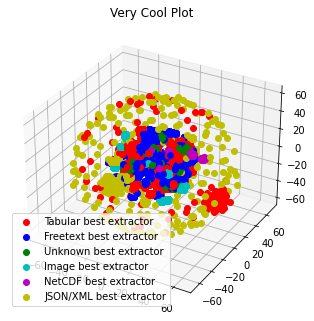

In [52]:
plot_extractors_against_feature_reduction_3d(TSNE_processed_data, Y, "Very Cool Plot")

In [53]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_extensions_against_feature_reduction_3d(X, Y2, title):	
	fig = plt.figure()
	ax = Axes3D(fig)

	assert len(X) == len(Y2)
	assert X.shape[1] == 3



	cmap = mcolors.ListedColormap([np.random.choice(list(mcolors.CSS4_COLORS.values())) for i in range(len(unique))])
	bounds=[i for i in range(len(unique))]
	norm = mcolors.BoundaryNorm(bounds, cmap.N)
	
	for i in range(len(Y2)):
		ax.scatter(X[i][0], X[i][1], X[i][2], c=int(Y2[i]), cmap=cmap, norm=norm)
	plt.title(title)
	plt.show()

/tmp/ipykernel_2998513/1860143781.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


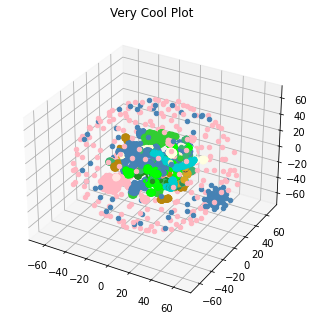

In [54]:
plot_extensions_against_feature_reduction_3d(TSNE_processed_data, Y2, "Very Cool Plot")